In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
from monkeylearn import MonkeyLearn

# modify these variables as needed
carBrand = 'Toyota'
timePeriod = 'pre'

preDate1 = '01/24/2020'
preDate2 = '01/31/2020'
postDate1 = '02/03/2020'
postDate2 = '02/06/2020'

if(timePeriod == 'pre'):
    dateLimit1 = preDate1
    dateLimit2 = preDate2
else:
    dateLimit1 = postDate1
    dateLimit2 = postDate2

In [2]:
df = pd.read_csv("../Datasets/" + carBrand + ".csv", error_bad_lines=False, sep=',')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)
df.index = df.index.normalize()

# limit dates
df = df.loc[dateLimit1:dateLimit2]
# set original index as index
df.reset_index(inplace = True)
# only keep selected columns
df = df[['date','text']]
df

c:\users\eric\source\repos\socialweb\socialenv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,text
0,2020-01-24,Audi # TanpamuAkuTetapBahagia
1,2020-01-24,Pode ser um audi a3 tbm q ta bão
2,2020-01-24,They are so stingy muthafuckers. Making big mo...
3,2020-01-24,2021 Audi A3 Redesign | Audi Car USA https://a...
4,2020-01-24,Make memories in the # Audi # A6 Avant! # Foll...
...,...,...
29707,2020-01-31,Volkswagen and Audi join the industry movement...
29708,2020-01-31,LOL Audi RSQ8 on my cross aim.
29709,2020-01-31,"Mercedes, Porsche, BMW, Audi e a porra toda a ..."
29710,2020-01-31,Audi launches new electric car ad campaign fea...


In [ ]:
# create a new DataFrame with only english tweets
dfEn = pd.DataFrame(columns=df.columns) 

for index, row in df.iterrows():
    if (index%1000 == 0):
        print("Progress " + str(index))
    # using split() to count words in string
    nrOfWords = len(str(row.text).split())
    if (nrOfWords < 3):
        dfEn = dfEn.append(df.loc[index], ignore_index=True)
    else:
        try:
            textLang = detect(row.text)
        except:
            textLang = 'nah'
        if(textLang == 'en'):
            dfEn = dfEn.append(df.loc[index], ignore_index=True)

print("Done")
dfEn.to_csv(r'./sentiment-analysis-results/EnglishDF/' + carBrand + 'En_' + timePeriod + '.csv')

In [3]:
from monkeylearn import MonkeyLearn
ml = MonkeyLearn('c95f2f0a7fbde382e423578f08434c4e7710fcad')
model_id = 'cl_pi3C7JiL'

def analyseSentiment(text):
    data = [text]
    sentimentTag = 'Neutral'
    try:
        result = ml.classifiers.classify(model_id, data)
        sentimentTag = result.body[0].get('classifications')[0].get('tag_name')
    except:
        sentimentTag = 'Neutral'
    return sentimentTag

In [138]:
import random

def analyseSentimentDummy(text):
    nr = random.randint(1,10)
    if(0 < nr < 4):
        return "Positive"
    elif(3 < nr < 7):
        return "Negative"
    else:
        return "Neutral"

In [4]:
# create new DataFrame with 300 sample rows from original DataFrame
dfEn = pd.read_csv("./sentiment-analysis-results/EnglishDF/" + carBrand + "En_" + timePeriod + ".csv", error_bad_lines=False, sep=',')
dfEn.drop('Unnamed: 0', axis=1, inplace=True)
dfSentiment = dfEn.sample(n=300)
dfSentiment = dfSentiment.reset_index(drop=True)

sentiments = []
for index, row in dfSentiment.iterrows():
    if (index%20 == 0):
        print("Progress " + str(index))
    result = analyseSentiment(row.text)
    sentiments.append(result)
print("Done")

# add new column for sentiment data
dfSentiment['sentiment'] = sentiments
# export to csv
dfSentiment.to_csv(r'./sentiment-analysis-results/SentimentDF/' + carBrand + 'Sentiment_' + timePeriod + '.csv')

dfSentiment

Progress 0
Progress 20
Progress 40
Progress 60
Progress 80
Progress 100
Progress 120
Progress 140
Progress 160
Progress 180
Progress 200
Progress 220
Progress 240
Progress 260
Progress 280
Done


,date,text,sentiment
0,2020-02-04,1:40pm Ki garer a white toyota C-HR hybrid ver...,Neutral
1,2020-02-03,"I'm at Toyota City Showcase in 江東区, 東京都 https:...",Negative
2,2020-02-05,直感でいいなぁと思った人はRTだよ # supra # toyota # jdmpic.tw...,Negative
3,2020-02-03,5/5 # Review on @ ToyotaMotorCorp by kirankira...,Neutral
4,2020-02-05,@ SteveRattner What were the results of the au...,Negative
...,...,...,...
295,2020-02-04,"Quick adventure in southern Utah, west of Gunl...",Neutral
296,2020-02-06,Can the dude in the middle pick me up in his 2...,Negative
297,2020-02-04,Highlander Makes Appearance at 2020 Chicago Au...,Neutral
298,2020-02-03,Some Group Car Inspection at Campbelltown Toyo...,Neutral


Updated


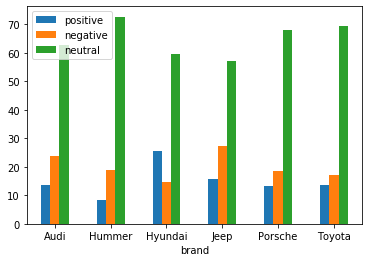

In [36]:
dfSentiment = pd.read_csv("./sentiment-analysis-results/SentimentDF/" + carBrand + "Sentiment_" + timePeriod + ".csv", error_bad_lines=False, sep=',')
# counts sentiments and puts them in separate variables (divided by 3 to get percentage)
sentimentCounts = dfSentiment['sentiment'].value_counts().to_frame()
positiveCount = sentimentCounts.loc['Positive'].sentiment/3
negativeCount = sentimentCounts.loc['Negative'].sentiment/3
neutralCount = sentimentCounts.loc['Neutral'].sentiment/3

dfCounts = pd.read_csv("./sentiment-analysis-results/Counts_" + timePeriod + ".csv", error_bad_lines=False, sep=',', index_col='brand')

new_df = pd.DataFrame({'brand': [carBrand], 'positive': [positiveCount], 'negative': [negativeCount], 'neutral': [neutralCount]})
new_df.set_index('brand', inplace=True)

# update counts if row already exists
if(carBrand in list(dfCounts.index.values)):
    dfCounts.update(new_df)
    print("Updated")
else:
    dfCounts = dfCounts.append(new_df)
    print("Appended")
    
dfCounts.to_csv(r'./sentiment-analysis-results/Counts_' + timePeriod + '.csv')

ax = dfCounts.plot.bar(rot=0)